In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from datetime import datetime, timedelta
today = datetime.now()
import datetime as dt

import matplotlib.dates as mdates

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# 5 days forecast

In [2]:
json_file = "Y:/Documents/5days.txt"  # pc cuisine
current = pd.read_json(json_file)
current.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,temp_kf,dt
0,9.30,7.57,8.68,9.30,1021,1021,1011,59,0.62,1742331600
1,8.80,7.02,7.81,8.80,1021,1021,1012,67,0.99,1742342400
2,7.69,6.03,6.88,7.69,1022,1022,1012,75,0.81,1742353200
3,6.22,4.63,6.22,6.22,1023,1023,1013,81,0.00,1742364000
4,10.11,8.69,10.11,10.11,1024,1024,1014,58,0.00,1742374800


In [3]:
current['dates'] = [datetime.fromtimestamp(current.dt[k]) for k in range(40)]
current['h_date'] = [datetime.fromtimestamp(current.dt[k]).strftime('%d/%m/%Y %H:%M:%S') for k in range(40)]
current['h_time'] = [datetime.fromtimestamp(current.dt[k]).strftime('%H') for k in range(40)]
current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   temp        40 non-null     float64       
 1   feels_like  40 non-null     float64       
 2   temp_min    40 non-null     float64       
 3   temp_max    40 non-null     float64       
 4   pressure    40 non-null     int64         
 5   sea_level   40 non-null     int64         
 6   grnd_level  40 non-null     int64         
 7   humidity    40 non-null     int64         
 8   temp_kf     40 non-null     float64       
 9   dt          40 non-null     int64         
 10  dates       40 non-null     datetime64[ns]
 11  h_date      40 non-null     object        
 12  h_time      40 non-null     object        
dtypes: datetime64[ns](1), float64(5), int64(5), object(2)
memory usage: 4.2+ KB


In [4]:
current.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,temp_kf,dt,dates,h_date,h_time
0,9.30,7.57,8.68,9.30,1021,1021,1011,59,0.62,1742331600,2025-03-18 22:00:00,18/03/2025 22:00:00,22
1,8.80,7.02,7.81,8.80,1021,1021,1012,67,0.99,1742342400,2025-03-19 01:00:00,19/03/2025 01:00:00,01
2,7.69,6.03,6.88,7.69,1022,1022,1012,75,0.81,1742353200,2025-03-19 04:00:00,19/03/2025 04:00:00,04
3,6.22,4.63,6.22,6.22,1023,1023,1013,81,0.00,1742364000,2025-03-19 07:00:00,19/03/2025 07:00:00,07
4,10.11,8.69,10.11,10.11,1024,1024,1014,58,0.00,1742374800,2025-03-19 10:00:00,19/03/2025 10:00:00,10


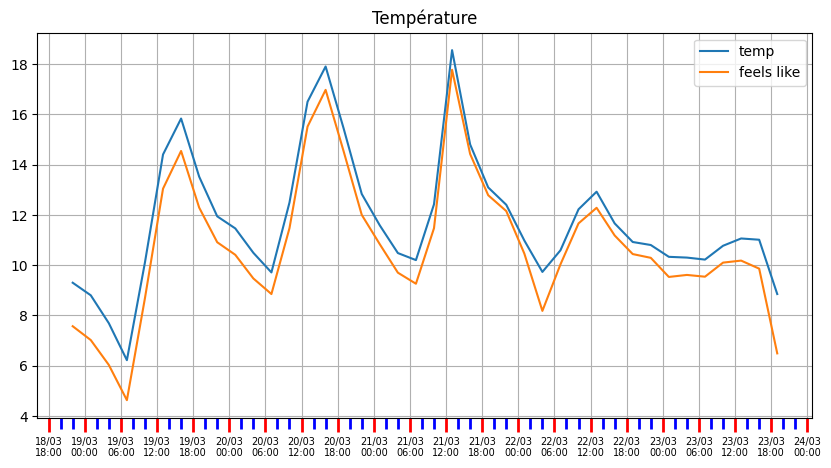

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

major_ticks = 1/4  # toutes les 6 heures pour 1/4, 12h pour 1/2, 3 heures pour 1/8
minor_ticks = major_ticks / 3
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))

ax.tick_params(axis='x', labelsize=7, width=2, which='both')
ax.tick_params(axis='x', length=10, color='r', which='major')
ax.tick_params(axis='x', length=8, color='b', which='minor')

# plot
plt.plot(current.dates, current.temp, label='temp')
plt.plot(current.dates, current.feels_like, label='feels like')

plt.legend()
plt.title('Température')
plt.grid()

# Wifi scan

In [6]:
json_file = r"C:\Users\jean\Desktop\array_to_sort.txt"  # pc cuisine
json_file = r"C:\Users\jean\Downloads\wifiscan.txt"
current2 = pd.read_json(json_file)
current2 = current2.sort_values(by='signal_level', ascending=False)
current2

,ssid,mac,signal_level,channel
0,Tenda_8C2A30_5G,50:0f:f5:8c:2a:35,-50.5,36
1,Tenda_8C2A30,50:0f:f5:8c:2a:31,-53.5,2
2,FreeWifi_secure,e4:9e:12:15:db:bb,-71.0,3
3,freebox_Ighilali,e4:9e:12:15:db:ba,-72.0,3
4,Samsung Fridge_E50AJTRB022P,1c:e8:9e:14:ca:4d,-76.0,1
5,Xiaomi_B02C,9c:9d:7e:48:06:c6,-78.5,11
6,Bbox-10F41ACA,20:9a:7d:08:67:90,-79.5,6
7,FreeWifi_secure,e4:9e:12:0a:0f:5c,-85.0,11
8,famille cisse,22:66:cf:4f:95:94,-86.0,11
9,Bbox-594852B6,44:d4:54:7e:e6:20,-89.5,1


In [7]:
current2['signal_level'] = current2['signal_level'] + 100
current2


,ssid,mac,signal_level,channel
0,Tenda_8C2A30_5G,50:0f:f5:8c:2a:35,49.5,36
1,Tenda_8C2A30,50:0f:f5:8c:2a:31,46.5,2
2,FreeWifi_secure,e4:9e:12:15:db:bb,29.0,3
3,freebox_Ighilali,e4:9e:12:15:db:ba,28.0,3
4,Samsung Fridge_E50AJTRB022P,1c:e8:9e:14:ca:4d,24.0,1
5,Xiaomi_B02C,9c:9d:7e:48:06:c6,21.5,11
6,Bbox-10F41ACA,20:9a:7d:08:67:90,20.5,6
7,FreeWifi_secure,e4:9e:12:0a:0f:5c,15.0,11
8,famille cisse,22:66:cf:4f:95:94,14.0,11
9,Bbox-594852B6,44:d4:54:7e:e6:20,10.5,1


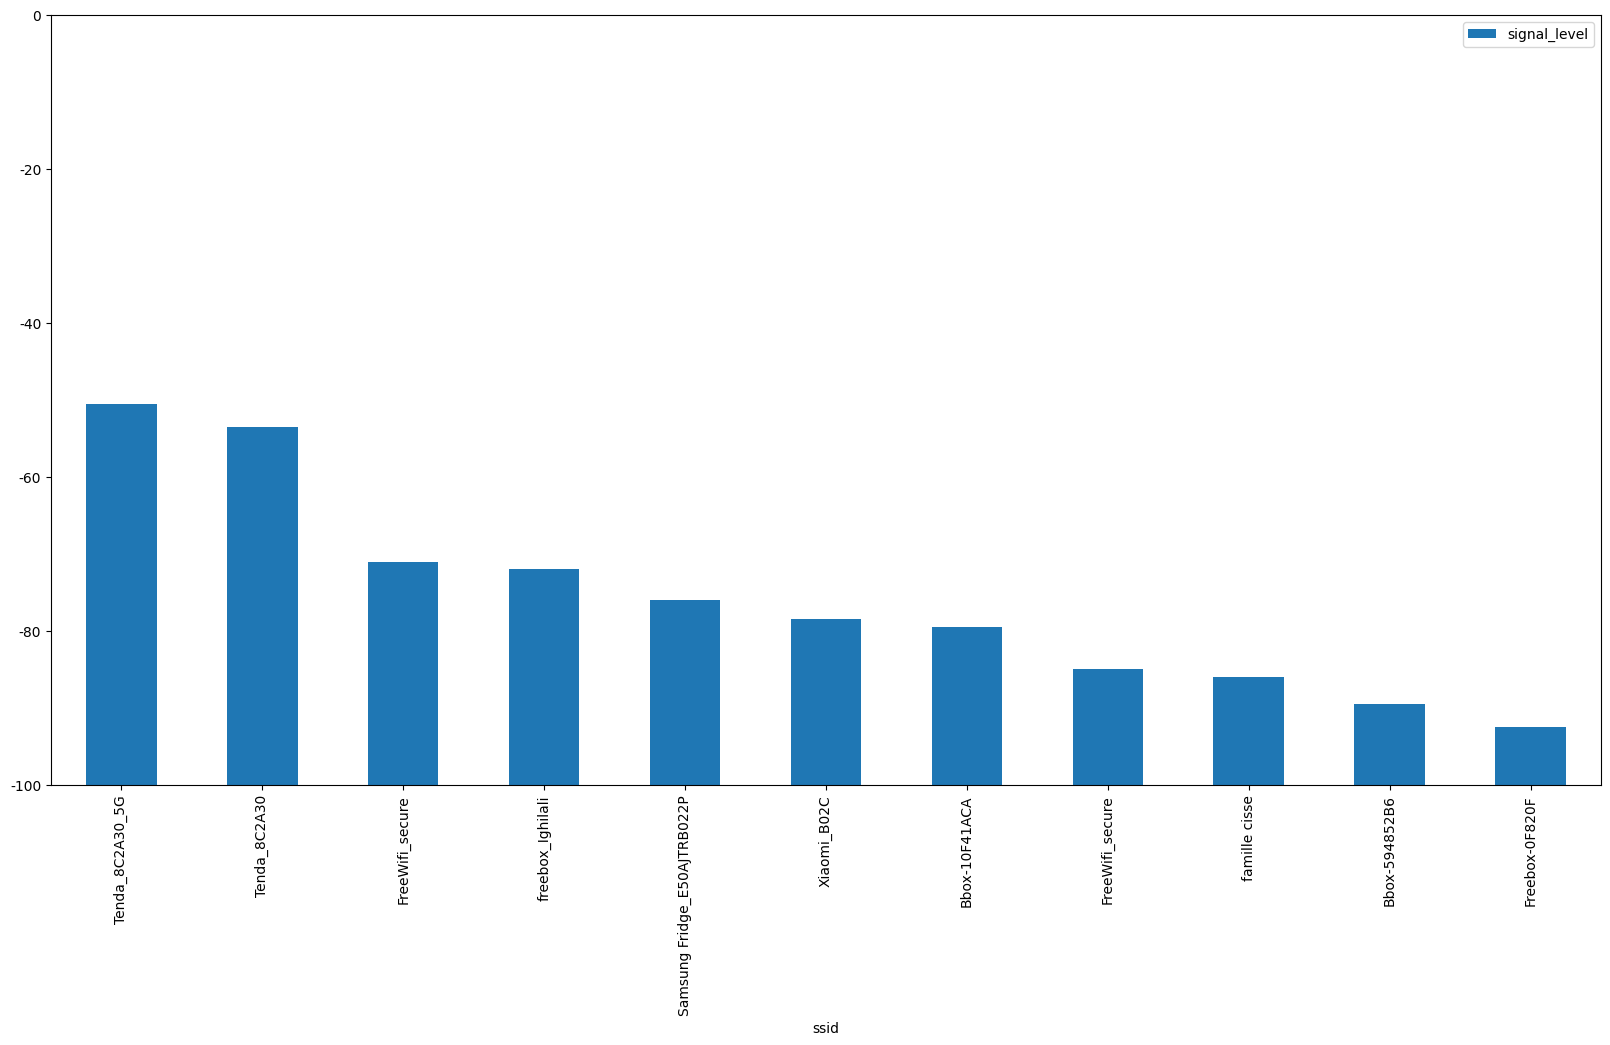

In [8]:
current2.plot(kind='bar', x='ssid', y='signal_level', figsize=(20, 10))

plt.ylim(0, 100)
plt.gca().set_yticks(plt.gca().get_yticks())  # Ensure the ticks are set before setting tick labels
plt.gca().set_yticklabels([str(int(label) - 100) for label in plt.gca().get_yticks()])
plt.show()

In [9]:
def process_input_string(input_string):
    # Split the string into components
    id_name, level_channel = input_string.split(" - ")
    name, level_channel = level_channel.split(": ")
    level, channel = level_channel.split(" CH ")

    # Create a dictionary with the specified names
    data = {
        "id": id_name,
        "name": name,
        "level": int(level),
        "channel": int(channel)
    }

    # Convert the dictionary to a JSON object
    json_data = json.dumps(data).replace('"', '\\"') #, indent=4)
    node_red_code = f"""
    [{{"id":"{data['id']}","type":"inject","name":"","props":[{{"p":"payload"}}],"repeat":"",
    "crontab":"","once":false,"onceDelay":0.1,"topic":"",
    "payload":"{json_data}","payloadType":"json","x":180,"y":80,"wires":[["n1"]]}},
    {{"id":"n1","type":"debug","name":"debug","active":true,"tosidebar":true,
    "console":false,"tostatus":false,"complete":"payload","targetType":"msg","x":330,"y":80,"wires":[]}}]
    """
    return json_data, node_red_code, data

# Example usage
input_string = "1 - Samsung Fridge_E50AJTRB022P: -74 CH 1"
json_data, node_red_code, data = process_input_string(input_string)
print(json_data)

{\"id\": \"1\", \"name\": \"Samsung Fridge_E50AJTRB022P\", \"level\": -74, \"channel\": 1}


In [10]:
json_data

'{\\"id\\": \\"1\\", \\"name\\": \\"Samsung Fridge_E50AJTRB022P\\", \\"level\\": -74, \\"channel\\": 1}'

In [11]:
print(node_red_code)


    [{"id":"1","type":"inject","name":"","props":[{"p":"payload"}],"repeat":"",
    "crontab":"","once":false,"onceDelay":0.1,"topic":"",
    "payload":"{\"id\": \"1\", \"name\": \"Samsung Fridge_E50AJTRB022P\", \"level\": -74, \"channel\": 1}","payloadType":"json","x":180,"y":80,"wires":[["n1"]]},
    {"id":"n1","type":"debug","name":"debug","active":true,"tosidebar":true,
    "console":false,"tostatus":false,"complete":"payload","targetType":"msg","x":330,"y":80,"wires":[]}]
    
